# Zillow Exploration

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from wrangle_zillow import prep_zillow

## First lets get our data

In [2]:
zillow = prep_zillow()
zillow

/Users/ryanmccall/codeup-data-science/ds-methodologies-exercises/clustering/wrangle_zillow.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow.calculatedfinishedsquarefeet[zillow.calculatedfinishedsquarefeet.isna()] = zillow.calculatedfinishedsquarefeet.median()


,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,...,structuretaxvaluedollarcnt,assessmentyear,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,County,State
0,1727539,14297519,3.5,4.0,6.0,3100.0,3100.0,6059.0,33634931.0,-117869207.0,...,485713.0,2016.0,11013.72,6.059063e+13,0.025595,2017-01-01,LAR1,Single Family Residential,Orange,CA
1,1387261,17052889,1.0,2.0,6.0,1465.0,1465.0,6111.0,34449266.0,-119281531.0,...,88000.0,2016.0,5672.48,6.111001e+13,0.055619,2017-01-01,LAR1,Single Family Residential,Ventura,CA
2,11677,14186244,2.0,3.0,6.0,1243.0,1243.0,6059.0,33886168.0,-117823170.0,...,85289.0,2016.0,6488.30,6.059022e+13,0.005383,2017-01-01,LAR1,Single Family Residential,Orange,CA
3,2288172,12177905,3.0,4.0,8.0,2376.0,2376.0,6037.0,34245180.0,-118240722.0,...,108918.0,2016.0,1777.51,6.037300e+13,-0.103410,2017-01-01,LCR110000*,Single Family Residential,Los Angeles,CA
4,1970746,10887214,3.0,3.0,8.0,1312.0,1312.0,6037.0,34185120.0,-118414640.0,...,73681.0,2016.0,1533.89,6.037124e+13,0.006940,2017-01-01,LAR3,Condominium,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,2.0,2.0,6.0,1286.0,1286.0,6037.0,34245368.0,-118282383.0,...,70917.0,2016.0,4478.43,6.037101e+13,0.020615,2017-09-20,LARE40,Single Family Residential,Los Angeles,CA
77377,2968375,17239384,2.0,4.0,6.0,1612.0,1612.0,6111.0,34300140.0,-118706327.0,...,50683.0,2016.0,1107.48,6.111008e+13,0.013209,2017-09-21,LAR1,Single Family Residential,Ventura,CA
77378,1843709,12773139,1.0,3.0,4.0,1032.0,1032.0,6037.0,34040895.0,-118038169.0,...,32797.0,2016.0,876.43,6.037434e+13,0.037129,2017-09-21,SER1*,Single Family Residential,Los Angeles,CA
77379,1187175,12826780,2.0,3.0,6.0,1762.0,1762.0,6037.0,33937685.0,-117996709.0,...,140000.0,2016.0,6317.15,6.037503e+13,0.007204,2017-09-25,WHR16000*,Single Family Residential,Los Angeles,CA


## Now let's split the data before checking it out

In [3]:
train, test = train_test_split(zillow, train_size=0.8, random_state=13)
train, val = train_test_split(zillow, train_size=0.8, random_state=13)
train

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,...,structuretaxvaluedollarcnt,assessmentyear,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,County,State
1276,527786,11962313,1.0,2.0,4.0,856.0,856.0,6037.0,34117232.0,-118227493.0,...,25242.0,2016.0,765.87,6.037186e+13,0.314515,2017-01-06,LAR1,Single Family Residential,Los Angeles,CA
16177,1655136,14603534,2.0,2.0,6.0,1052.0,1052.0,6059.0,33667397.0,-117850497.0,...,242046.0,2016.0,4848.40,6.059063e+13,-0.019215,2017-03-10,LAR1,Condominium,Orange,CA
16351,2144782,14245831,1.5,3.0,6.0,1211.0,1211.0,6059.0,33770815.0,-117824813.0,...,65788.0,2016.0,5170.48,6.059076e+13,-0.063000,2017-03-13,LAR1,Single Family Residential,Orange,CA
75971,563843,14243531,2.0,3.0,6.0,1710.0,1710.0,6059.0,33773323.0,-117794235.0,...,51864.0,2016.0,1214.62,6.059076e+13,0.048322,2017-09-13,LAR1,Single Family Residential,Orange,CA
30329,302247,11526522,2.0,2.0,9.0,1952.0,1952.0,6037.0,33985700.0,-118435000.0,...,301112.0,2016.0,5290.53,6.037275e+13,0.031406,2017-04-27,LARD2,Condominium,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40848,580311,14753399,2.5,3.0,6.0,1374.0,1374.0,6059.0,33575045.0,-117705485.0,...,134953.0,2016.0,5379.60,6.059042e+13,-0.069040,2017-05-30,LAR1,Condominium,Orange,CA
28118,1879107,11845166,3.0,3.0,7.0,1930.0,1930.0,6037.0,34058700.0,-118112000.0,...,275000.0,2016.0,8121.79,6.037482e+13,0.014923,2017-04-20,MPR3*,Condominium,Los Angeles,CA
72866,2155568,12548418,2.0,2.0,6.0,1593.0,1593.0,6037.0,33765600.0,-118182000.0,...,357144.0,2016.0,7092.73,6.037577e+13,0.001149,2017-09-01,LBPD5,Condominium,Los Angeles,CA
37359,2085212,14270176,2.5,3.0,6.0,1924.0,1924.0,6059.0,33680490.0,-117894803.0,...,188964.0,2016.0,5470.40,6.059064e+13,-0.021273,2017-05-18,LAR1,Single Family Residential,Orange,CA


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55787 entries, 1276 to 52440
Data columns (total 31 columns):
id                              55787 non-null int64
parcelid                        55787 non-null int64
bathroomcnt                     55787 non-null float64
bedroomcnt                      55787 non-null float64
buildingqualitytypeid           55787 non-null float64
calculatedfinishedsquarefeet    55787 non-null float64
finishedsquarefeet12            55787 non-null float64
fips                            55787 non-null float64
latitude                        55787 non-null float64
longitude                       55787 non-null float64
lotsizesquarefeet               55787 non-null float64
propertycountylandusecode       55787 non-null object
propertylandusetypeid           55787 non-null float64
propertyzoningdesc              55787 non-null object
rawcensustractandblock          55787 non-null float64
regionidcity                    55787 non-null float64
regionidcounty

## Next let's plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

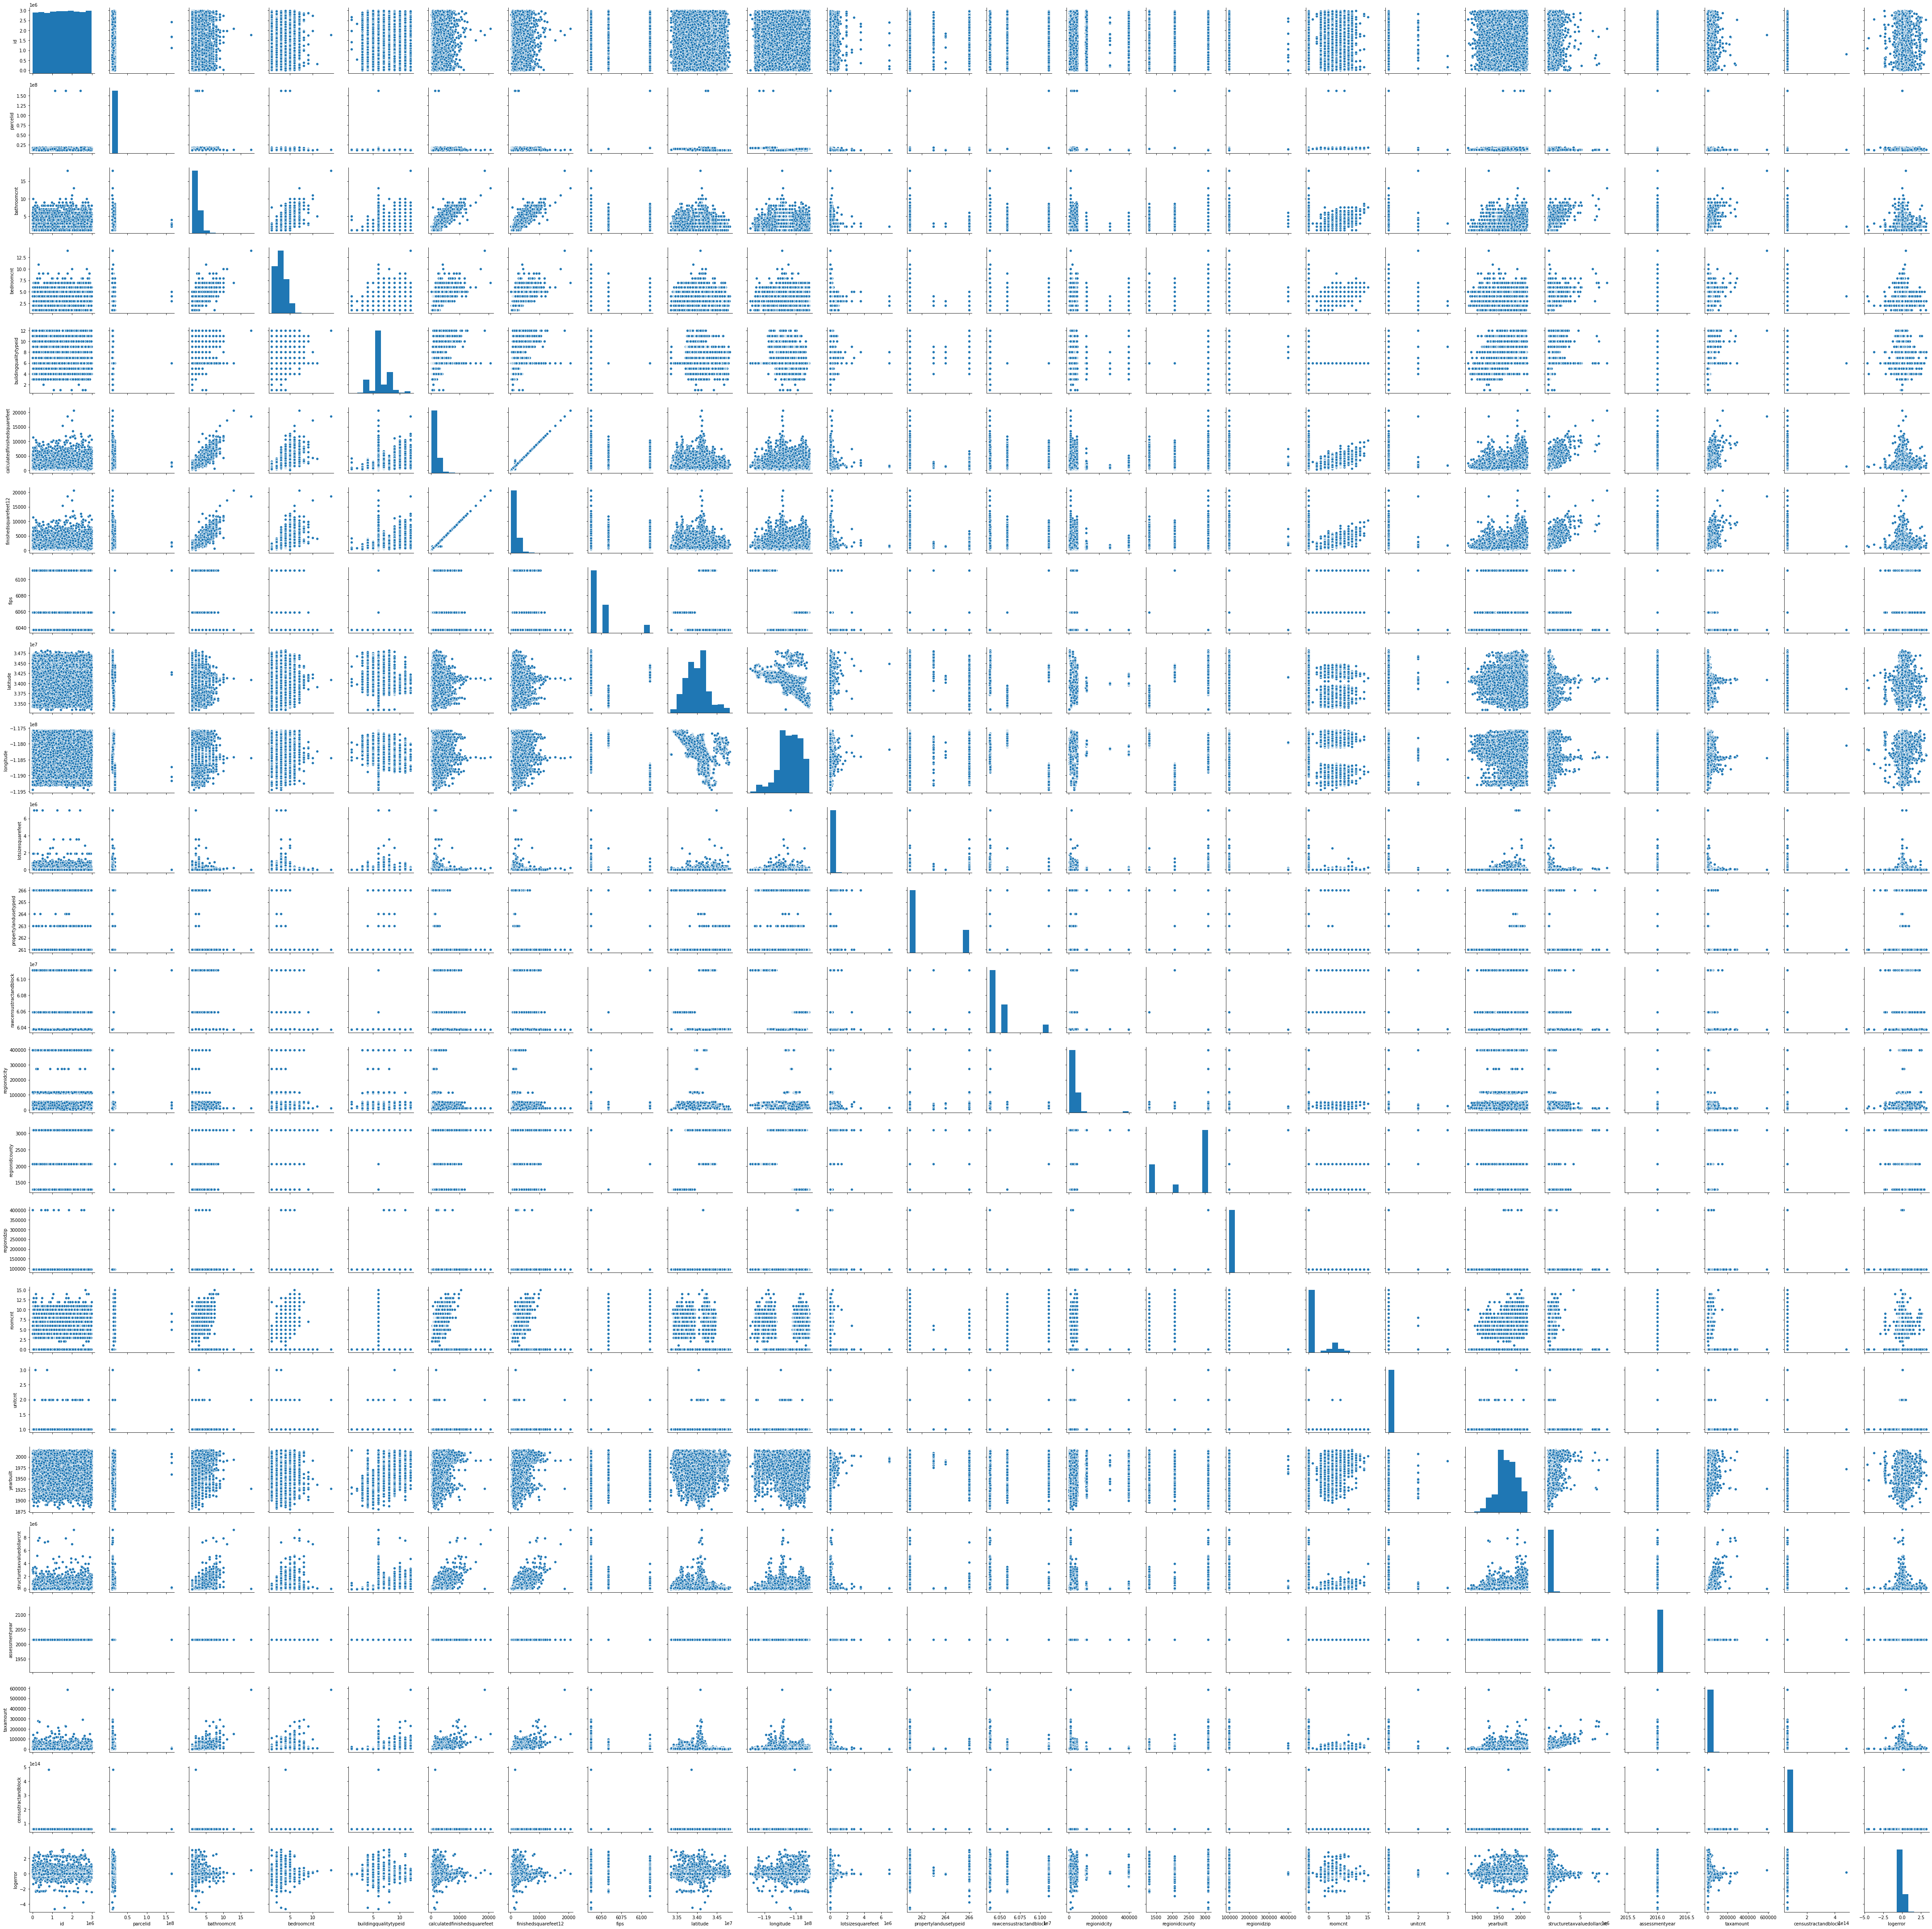

In [6]:
sns.pairplot(train)

## Plot a correlation matrix heatmap.

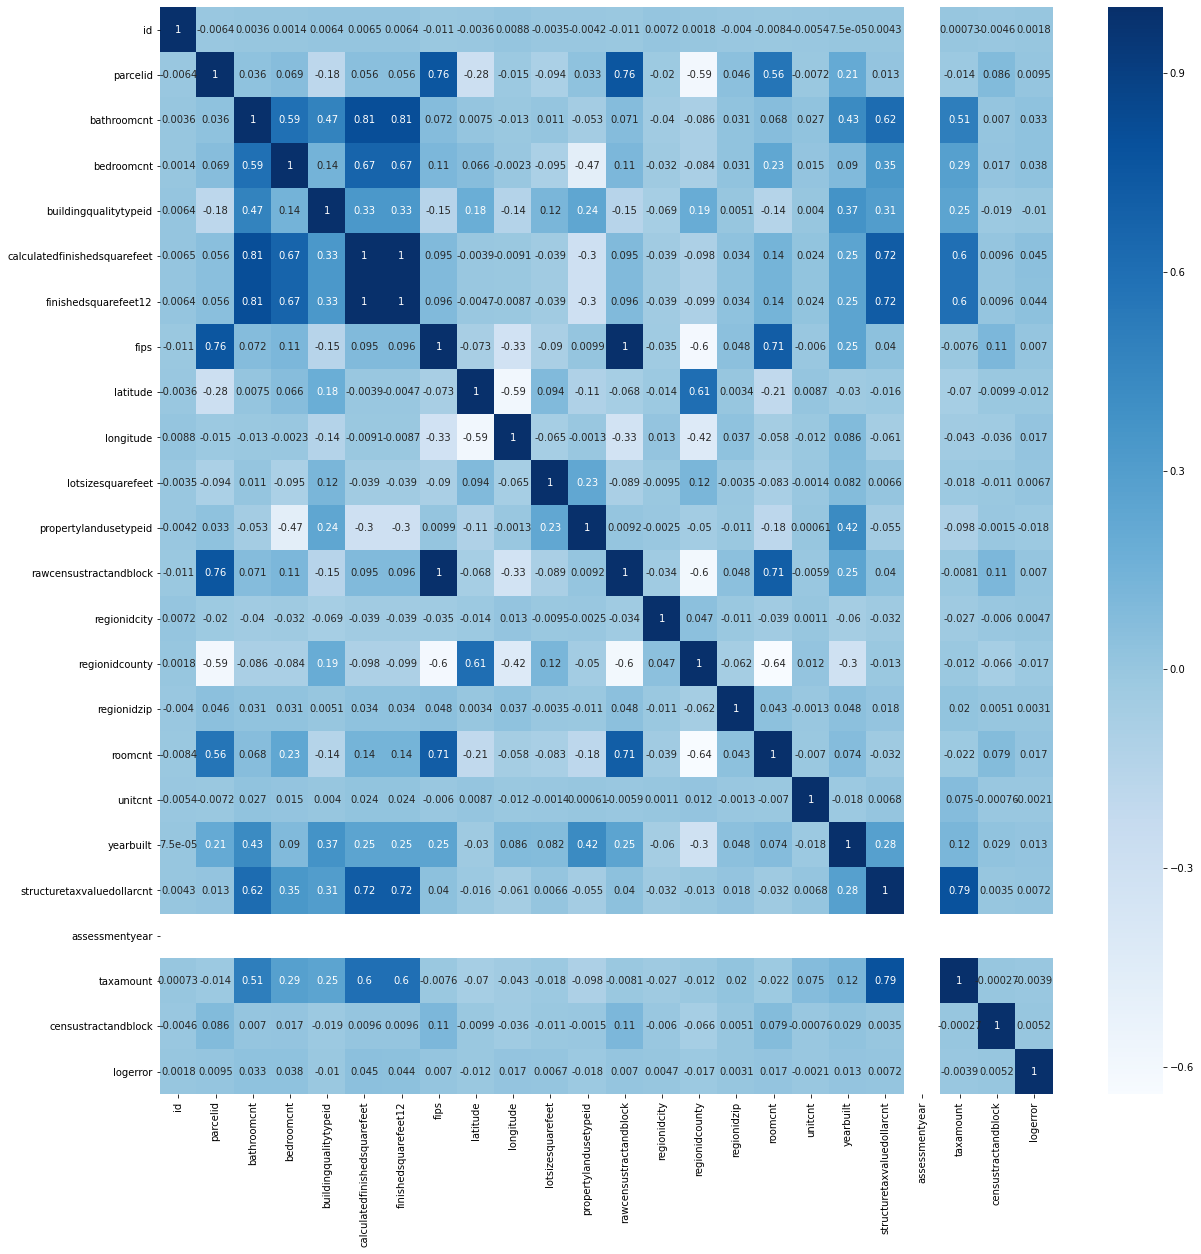

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

## Plot latitude agains longitude.

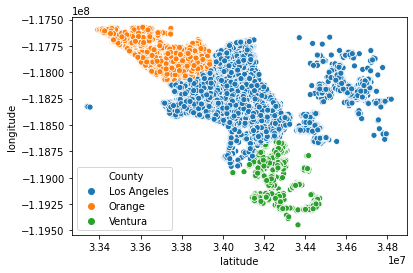

In [8]:
sns.scatterplot(x=train.latitude, y=train.longitude, hue=train.County)

## Create a useable plot with 4 dimensions, e.g. x, y, color, size.

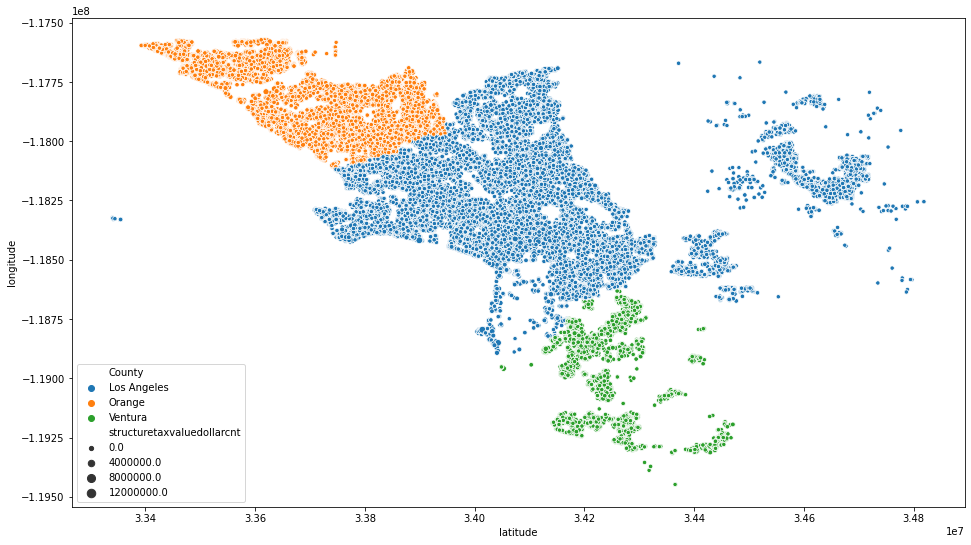

In [12]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x=train.latitude, y=train.longitude, hue=train.County, size=train.structuretaxvaluedollarcnt)

## Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [20]:
pop_mean_logerror = train.logerror.mean()
zipcode_mean_logerror = train.groupby("regionidzip")['logerror'].mean()
pop_mean_logerror, zipcode_mean_logerror

(0.016595461333283885, regionidzip
 95982.0    -0.000291
 95983.0     0.003624
 95984.0    -0.081239
 95985.0    -0.026675
 95986.0     0.042867
               ...   
 97329.0     0.021103
 97330.0     0.017784
 97331.0     0.044624
 97344.0     0.028841
 399675.0    0.030028
 Name: logerror, Length: 385, dtype: float64)

## Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?